In [2]:
%matplotlib notebook  

import numpy as np
import pandas as pd
import matplotlib.pylab as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import seaborn as sns

df = pd.read_csv('iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [39]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [25]:
df['species_code'] = df['species'].replace({
    'setosa' : 1,
    'versicolor' : 2,
    'virginica' : 3,
})


In [29]:
x = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].as_matrix()
y = df[['species_code']].as_matrix()

x_setosa = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']][df['species_code'] == 1].as_matrix()
x_versic = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']][df['species_code'] == 2].as_matrix()
x_virgin = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']][df['species_code'] == 3].as_matrix()


<IPython.core.display.Javascript object>


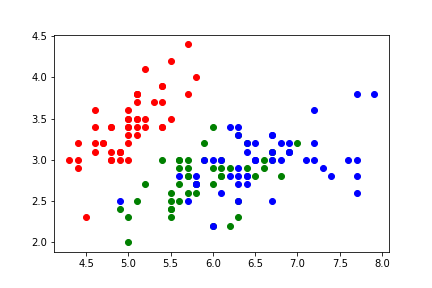

<module 'matplotlib.pylab' from '/home/atta/.local/lib/python3.5/site-packages/matplotlib/pylab.py'>

In [35]:
plt.plot(x_setosa[:,0], x_setosa[:,1], 'ro')
plt.plot(x_versic[:,0], x_versic[:,1], 'go')
plt.plot(x_virgin[:,0], x_virgin[:,1], 'bo')


plt


<IPython.core.display.Javascript object>


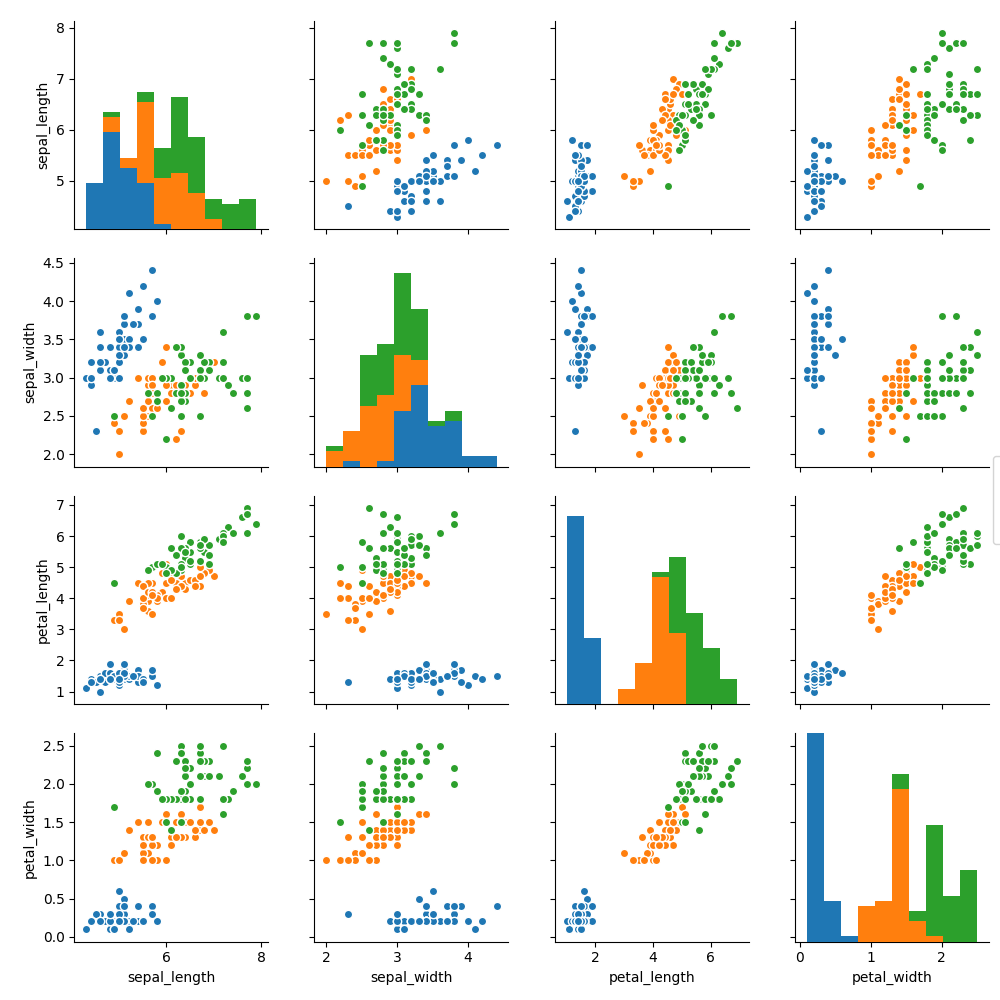

In [3]:


sns.pairplot(df, hue='species')

In [4]:
all_inputs = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
all_classes = df[['species']].values

(train_inputs, test_inputs, train_classes, test_classes) = train_test_split(all_inputs, all_classes, train_size=0.7, random_state=1)

dtc = DecisionTreeClassifier()
dtc.fit(train_inputs, train_classes)
dtc.score(test_inputs, test_classes)

/home/atta/.local/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


0.9555555555555556

In [6]:
from sklearn import tree
etc = tree.ExtraTreeClassifier()
etc.fit(train_inputs, train_classes)
etc.score(test_inputs, test_classes)

0.93333333333333335

In [8]:
from sklearn import svm
svc = svm.LinearSVC()
svc.fit(train_inputs, train_classes)
svc.score(test_inputs, test_classes)

/home/atta/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.91111111111111109

In [9]:
svc = svm.NuSVC()
svc.fit(train_inputs, train_classes)
svc.score(test_inputs, test_classes)

/home/atta/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.97777777777777775

In [10]:
svc = svm.SVC()
svc.fit(train_inputs, train_classes)
svc.score(test_inputs, test_classes)

/home/atta/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.97777777777777775